<a href="https://colab.research.google.com/github/psiudo/NumericalMethods/blob/main/iris_classification_by_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 import pandas as pd; import numpy as np; from keras.utils import *
 from keras.models import Sequential
 from keras.layers import Dense, Flatten, Dropout
 from sklearn.preprocessing import LabelEncoder
 from sklearn.model_selection import train_test_split
 from sklearn.datasets import load_iris; import matplotlib.pyplot as plt
 iris = load_iris(); y = iris.target
 iris_Data = pd.DataFrame(data = iris.data, columns = iris.feature_names);
 X=iris_Data.loc[:,['sepal length (cm)','sepal width (cm)', 'petal length (cm)','petal width (cm)']].to_numpy()
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
 X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [4]:
model = Sequential([
  Dense(128, activation='relu',input_shape=(4,)),
  Dropout(0.1),
  Dense(32, activation='relu'),
  Dense(3, activation='softmax')])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,867 (19.01 KB)

 Trainable params: 4,867 (19.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - accuracy: 0.3438 - loss: 1.2267 - val_accuracy: 0.0833 - val_loss: 1.0820
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2721 - loss: 1.1369 - val_accuracy: 0.2083 - val_loss: 1.1083
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3737 - loss: 1.0552 - val_accuracy: 0.2500 - val_loss: 1.0979
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5781 - loss: 0.9385 - val_accuracy: 0.4583 - val_loss: 1.0662
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6328 - loss: 0.9529 - val_accuracy: 0.4583 - val_loss: 1.0396
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7031 - loss: 0.8058 - val_accuracy: 0.4583 - val_loss: 1.0117
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7135 - loss: 0.8002 - val_accuracy: 0.4583 - val_loss: 0.9665
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7018 - loss: 0.7773 - val_accuracy: 0.4583 - val_loss

[0.011459245346486568, 1.0]

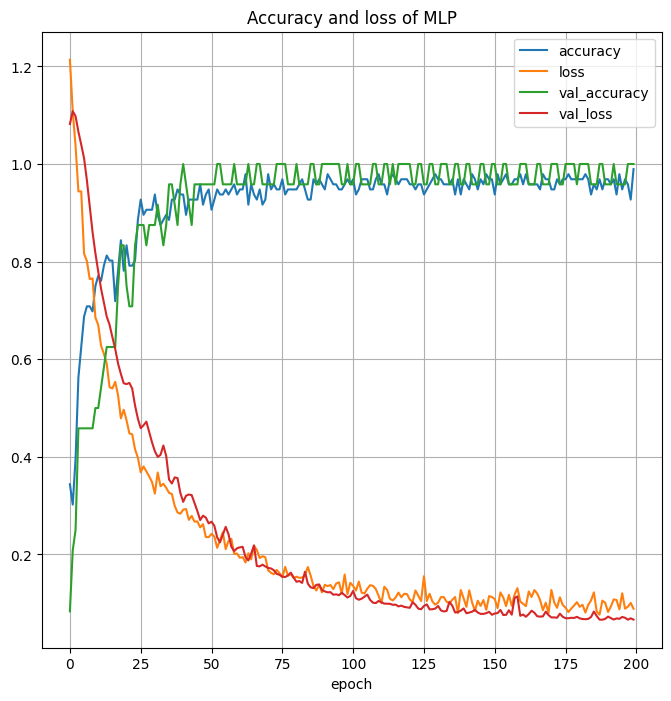

In [5]:
 model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
 history = model.fit(X_train, y_train, epochs=200, validation_data=(X_valid, y_valid))
 pd.DataFrame(history.history).plot(figsize=(8, 8))
 plt.grid(True) ;plt.title("Accuracy and loss of MLP");plt.xlabel("epoch")
 model.evaluate(X_test, y_test)

In [8]:
model = Sequential([
  Dense(128, activation='relu',input_shape=(4,)),
  Dropout(0.2),
  Dense(32, activation='relu'),
  Dense(3, activation='softmax')])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 128)                 │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,867 (19.01 KB)

 Trainable params: 4,867 (19.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.2031 - loss: 1.4467 - val_accuracy: 0.4167 - val_loss: 1.0606
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2083 - loss: 1.1959 - val_accuracy: 0.5417 - val_loss: 0.9885
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5117 - loss: 1.0420 - val_accuracy: 0.6667 - val_loss: 0.9534
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5716 - loss: 0.9216 - val_accuracy: 0.4167 - val_loss: 0.9452
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5091 - loss: 0.9255 - val_accuracy: 0.4583 - val_loss: 0.9614
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6797 - loss: 0.8178 - val_accuracy: 0.4583 - val_loss: 0.9381
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7227 - loss: 0.7981 - val_accuracy: 0.4583 - val_loss: 0.8856
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7786 - loss: 0.6831 - val_accuracy: 0.4583 - val_loss

[0.005932344123721123, 1.0]

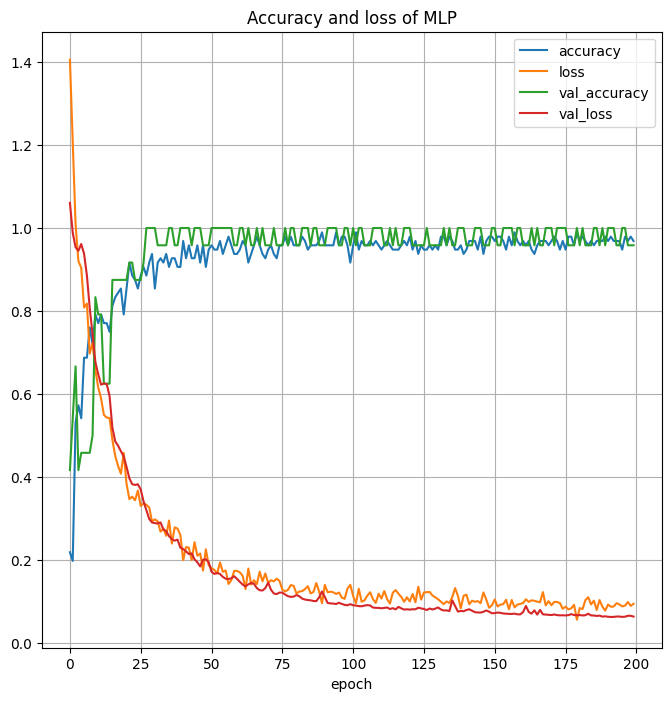

In [9]:
 model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
 history = model.fit(X_train, y_train, epochs=200, validation_data=(X_valid, y_valid))
 pd.DataFrame(history.history).plot(figsize=(8, 8))
 plt.grid(True) ;plt.title("Accuracy and loss of MLP");plt.xlabel("epoch")
 model.evaluate(X_test, y_test)